In [102]:
import dxfgrabber  #after doing "pip install dxfgrabber" from a terminal window
#CKH the plan is to create 2D cad files then move them out as dxf, spit out a csv file of xy points along paths it finds
#Another program reads the xy points to create an embroidery pattern

In [103]:
dxf=dxfgrabber.readfile("MThreadOnlySparse.dxf") #see https://pythonhosted.org/dxfgrabber/   

In [104]:
print("DXF version: {}".format(dxf.dxfversion))
header_var_count = len(dxf.header) # dict of dxf header vars
#what else is here? see this http://stackoverflow.com/questions/16634209/python-how-to-use-a-third-party-library

DXF version: AC1018


In [105]:
for layer in dxf.layers:  #peeking at what is here
    print layer.name
    print layer.color

0
7
Layer 1
7


In [106]:
#get all entities on layer x --this does nothing but it is an example of what's available
all_layer_0_entities = [entity for entity in dxf.entities if entity.layer == '0']
all_layer_1_entities = [entity for entity in dxf.entities if entity.layer == '1']
all_entities = [entity for entity in dxf.entities]
all_entities #I had a file where this did NOT find all the data


In [107]:
#all_entities=[]#so for this file I am starting over

In [108]:
dxf.entities.__len__()

1

In [109]:
for block in dxf.blocks:
    #print len(block)
    #print block.name  #These names and layers change from file to file, I am just peeking
    #print dir(block)
    #print block._entities
    all_entities.extend(block._entities)

In [110]:
all_entities

In [111]:
stitchxdata=[]
stitchydata=[]
for entity in all_entities:
    print dir(entity)  #How I found out about the dxftype attribute. Splines are found in illustrator dxf file.
    print entity.dxftype
    if entity.dxftype == 'POLYLINE':  #did not find polylines in illustrator dxf file I made, but they were in Huichan's dxf
        #print dir(entity)
        for vertex in entity.vertices:
             #print vertex.location
             stitchxdata.append(vertex.location[0])
             stitchydata.append(vertex.location[1])
    if entity.dxftype == 'SPLINE':  #the splines ctrl points are chunky so in Illustrator i did "add anchor points" and hand edited
        prevx=[]
        prevy=[]
        for point in entity.controlpoints: #Does chunky matter? Will the fiber just flow around the corners bc it is sorta rigid?
            if ((point[0]==prevx) and (point[1]==prevy)):
                print('duplicate points found')
            else:
                stitchxdata.append(point[0]*25.4)#my illustrator file was in inches
                stitchydata.append(point[1]*25.4)
                prevx=point[0]
                prevy=point[1]# I would like to skip the hand-editing and interpolate this spline with evenly spaced points
    if entity.dxftype == 'INSERT': #found this thing in a file I started from scratch in illustrator
        print 'found an INSERT' 
        


['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'color', 'controlpoints', 'degree', 'dxftype', 'endtangent', 'extrusion', 'fitpoints', 'flags', 'invisible', 'is_closed', 'is_linear', 'is_periodic', 'is_planar', 'is_rational', 'knots', 'layer', 'linetype', 'ltscale', 'normalvector', 'paperspace', 'shadow_mode', 'starttangent', 'thickness', 'tol_controlpoint', 'tol_fitpoint', 'tol_knot', 'transparency', 'true_color', 'weights']
SPLINE
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate points found
duplicate poi

In [112]:
stitchxdata #just peeking

[-34.999953907348065,
 -33.12495945257742,
 -31.249964997806774,
 -29.374970543036127,
 -27.499976088265484,
 -25.624981633494837,
 -23.749987178724187,
 -21.874992723953536,
 -19.999998269182885,
 -18.058685682571475,
 -16.468773067272156,
 -15.394419331451804,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.999955638165192,
 -14.605491944878576,
 -13.531138209058224,
 -11.941225593758906,
 -9.999913007147496,
 -8.058600420536084,
 -6.4686878052367645,
 -5.39433406941641,
 -4.999870376129799,
 -4.999870376129799,
 -4.999870376129799,
 -4.999870376129799,
 -4.999870376129799,
 -4.999870376129799,
 -4.999870376129799,
 -4.999870376129799,
 -4.999870376129799,
 -4.999870376129799,
 -4

(-40.0, 40.0, -30.0, 30.0)

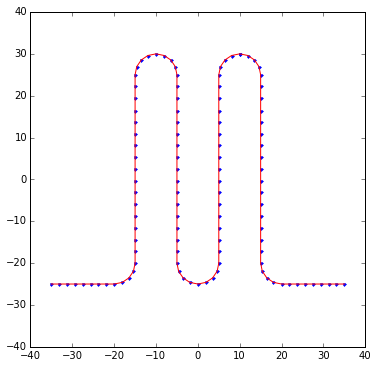

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
#getting this from here http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
plt.figure(1,figsize=(6,6))
plt.plot(stitchxdata,stitchydata,'b.')
plt.hold(True)
plt.plot(stitchxdata,stitchydata,'r-')
plt.axis('equal')



In [114]:
f=open('Meander.csv','w')
for i in range(0,len(stitchxdata)):
    f.write("%.3f,%.3f\r\n"%(stitchxdata[i],stitchydata[i]))
